# Text Vector Characteristics Analysis

In [13]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [14]:
def transformText(dataset):
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(dataset['TEXT'], dataset['CLASS'], test_size=0.2)

    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Vectorize the training and test sets
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)

    return X_train, X_test, y_train, y_test

def visualize_vectors(vectors, n_clusters=3):
    # Reduce the dimensionality of the vectors to 2 using PCA
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(vectors.toarray())

    # Cluster the reduced vectors using KMeans
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(reduced_vectors)
    labels = kmeans.labels_

    # Plot the reduced vectors on a scatter plot
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=labels, cmap='viridis')
    plt.show()

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_text_length_boxplot(data, name):
    # Calculate the length of the text vectors
    data['text_length'] = data['TEXT'].str.len()

    # Set the figure size
    plt.figure(figsize=(12, 6))

    # Create a boxplot of the text length by class
    sns.boxplot(x='CLASS', y='text_length', data=data)

    # Add labels and title
    plt.xlabel('Class')
    plt.ylabel('Text Length')
    plt.title(f'{name} - Boxplot of Text Length by Class')

    # Show the plot
    plt.show()


In [16]:
from scipy import stats

def test_normality(vectors):
    # Flatten the vectors into a 1D array
    values = vectors.toarray().flatten()

    # Exclude zero values from the plot
    values = values[values != 0]

    # Calculate the kurtosis and skewness of the values
    kurtosis = stats.kurtosis(values)
    skewness = stats.skew(values)

    # Print the results
    print(f'Kurtosis: {kurtosis:.4f}, Skewness: {skewness:.4f}')

    # Interpret the results
    if abs(kurtosis) < 0.5 and abs(skewness) < 0.5:
        print('The distribution of the values is approximately normal.')
    else:
        print('The distribution of the values is not normal.')


In [17]:
def plot_frequency(vectors, name):

    test_normality(vectors)

    # Flatten the vectors into a 1D array
    values = vectors.toarray().flatten()

    # Exclude zero values from the plot
    non_zero_values = values[values != 0]

    print("Zero vectors: ", len(values) - len(non_zero_values))

    # Create a histogram of the non-zero values
    plt.hist(non_zero_values, bins=50)
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Frequency')
    plt.title(f'{name} - Frequency plot of non-zero vectors')
    plt.show()

In [18]:
def visualize(dataset):
    data = pd.read_csv(f'../Datasets/Preprocessed/{dataset}/data.csv', index_col=0)
    if len(data)>90000:
        data = data.sample(90000)
    data.dropna(inplace=True)
    plot_text_length_boxplot(data, dataset)
    print("SHAPE: ", data.shape)
    X_train, X_test, y_train, y_test = transformText(data)
    # visualize_vectors(X_train)
    plot_frequency(X_train, dataset)

### Cornell Movie Review Dataset

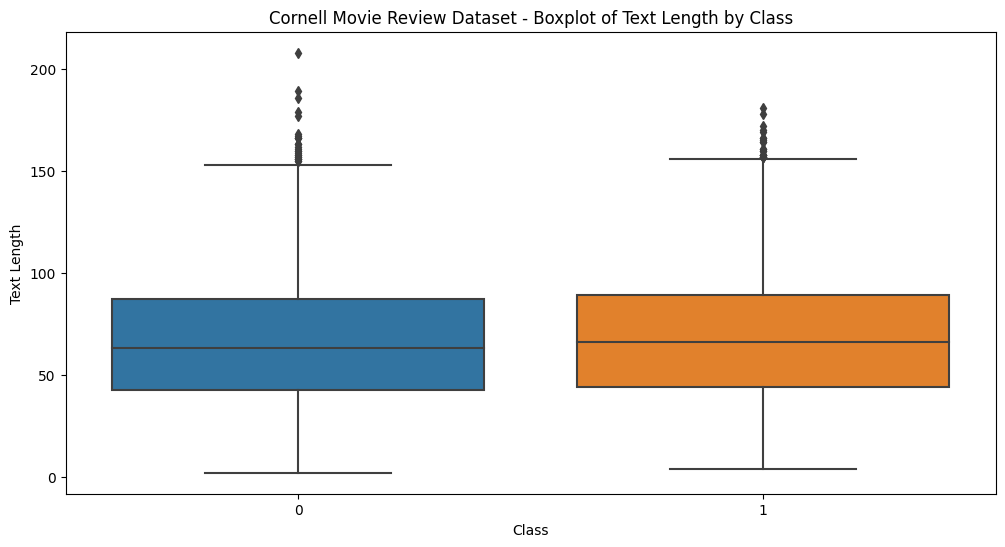

SHAPE:  (10662, 3)
Kurtosis: 3.1345, Skewness: 1.2229
The distribution of the values is not normal.
Zero vectors:  97405460


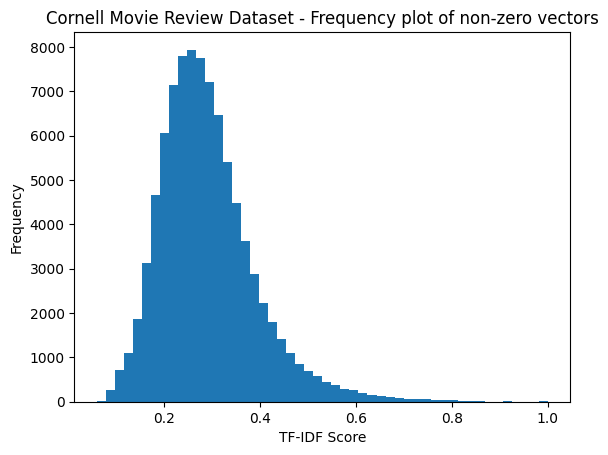

In [19]:
dataset = "Cornell Movie Review Dataset"
visualize(dataset)

### Hate Speech and Offensive Language Dataset

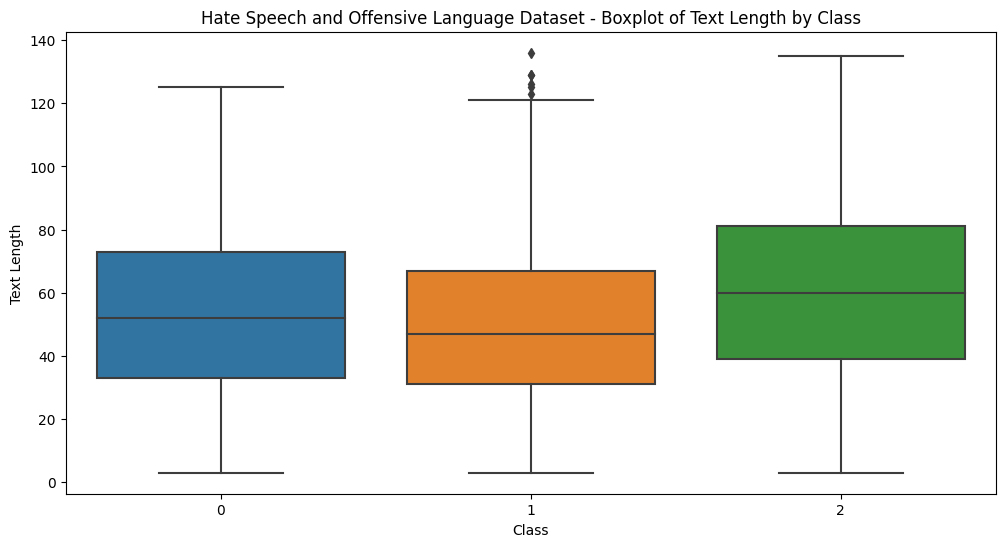

SHAPE:  (24783, 3)
Kurtosis: 1.5991, Skewness: 0.9437
The distribution of the values is not normal.
Zero vectors:  520320913


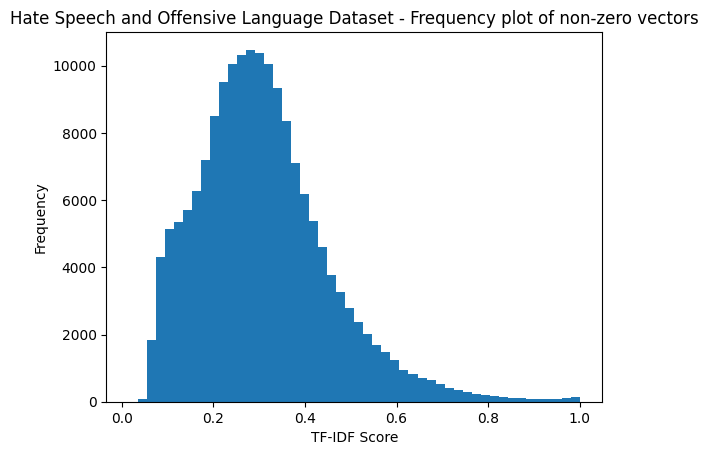

In [20]:
dataset = "Hate Speech and Offensive Language Dataset"
visualize(dataset)

### Twitter US Airline Sentiment dataset

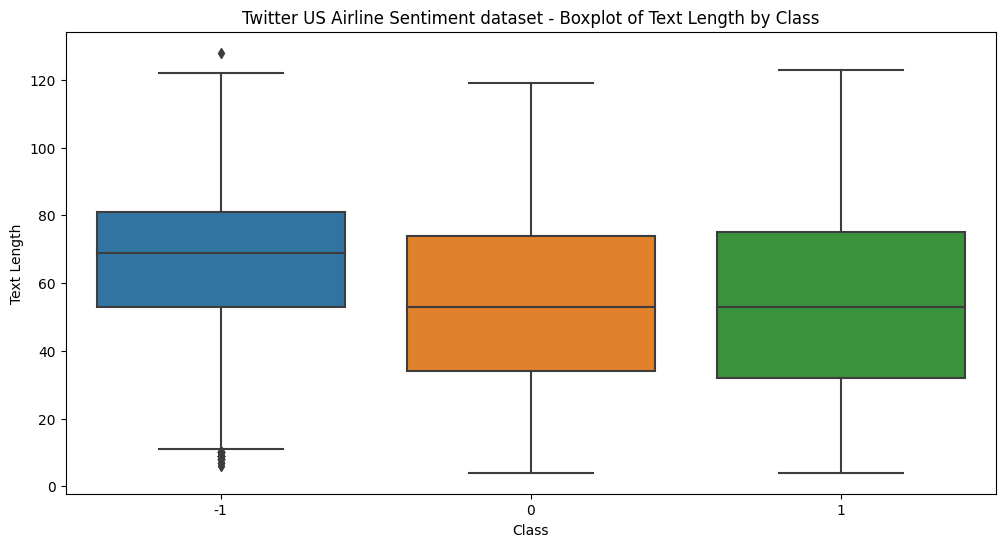

SHAPE:  (14640, 3)
Kurtosis: 2.3224, Skewness: 1.0741
The distribution of the values is not normal.
Zero vectors:  110401744


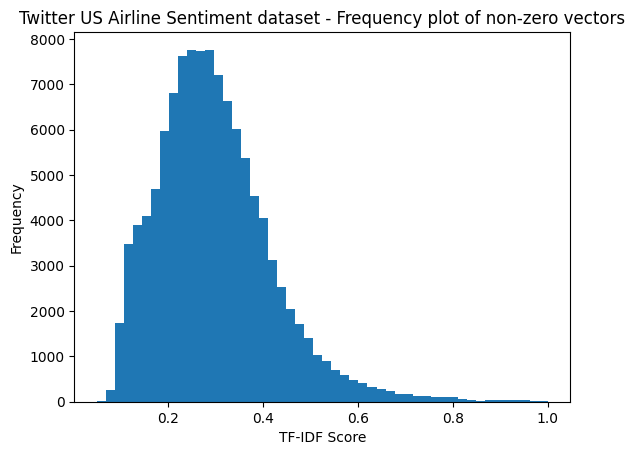

In [21]:
dataset = "Twitter US Airline Sentiment dataset"
visualize(dataset)

### UTKML Twitter Spam Detection Competition Dataset

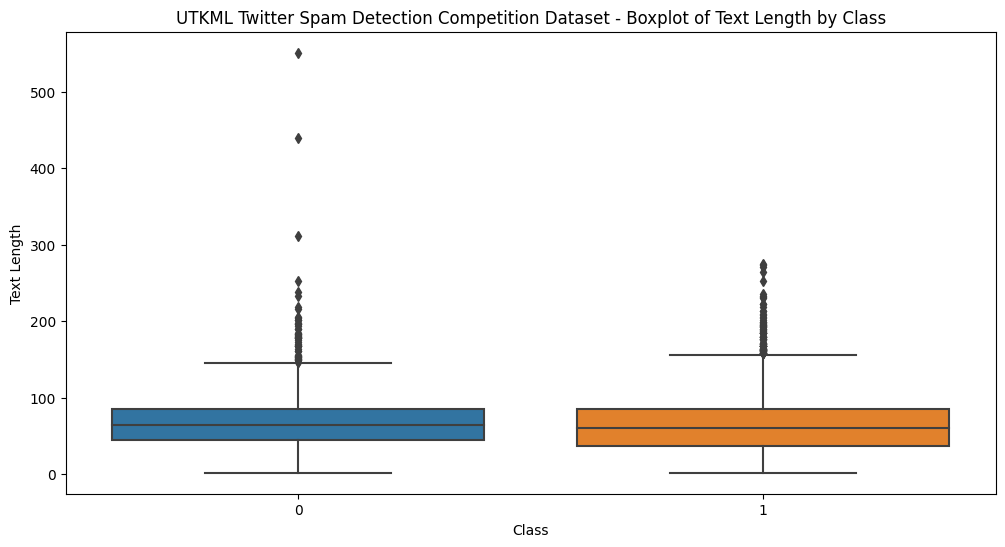

SHAPE:  (14878, 3)
Kurtosis: 2.6220, Skewness: 0.8790
The distribution of the values is not normal.
Zero vectors:  336279904


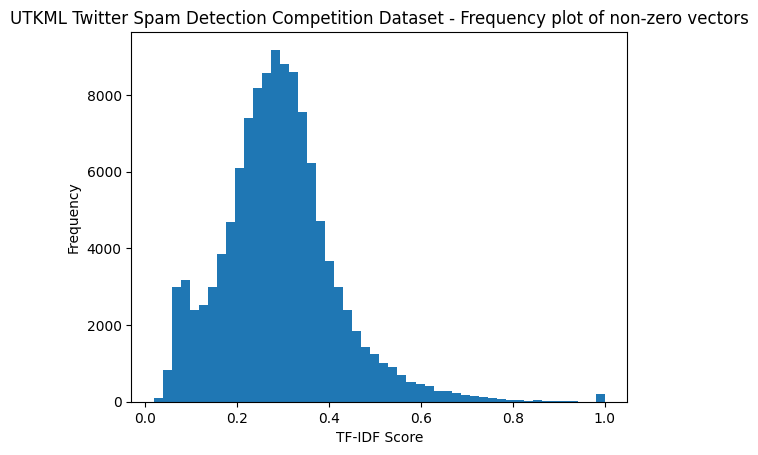

In [22]:
dataset = "UTKML Twitter Spam Detection Competition Dataset"
visualize(dataset)

### Sentiment140

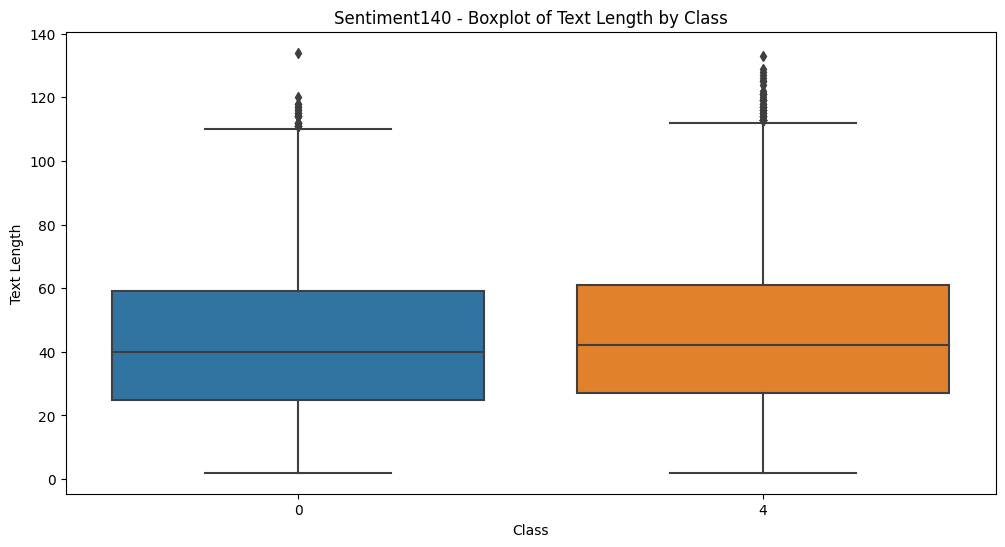

SHAPE:  (89978, 3)
Kurtosis: 2.0606, Skewness: 1.2534
The distribution of the values is not normal.
Zero vectors:  4407212860


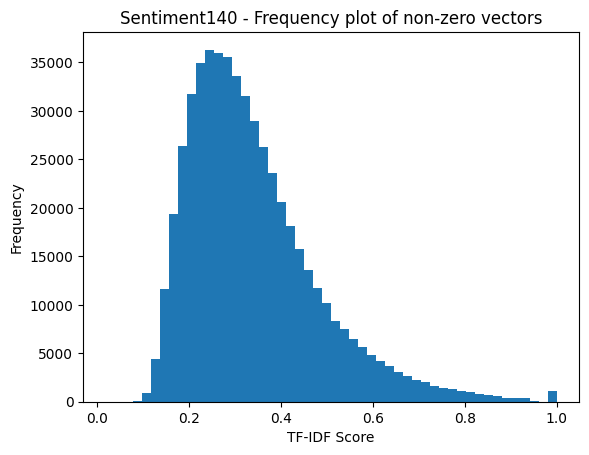

In [23]:
dataset = "Sentiment140"
visualize(dataset)